# Biosensing Analysis

### This notebook walks through the biosensing analysis: segmenting the image, calculating intensity and plotting against refractive index

In [1]:
from analysis.data_preprocessing import data_preprocessing 
from analysis.analysis import run_analysis

from segmentation.sam2wrapper import SAM2Wrapper
import numpy as np
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
from segmentation.utils import show_anns
from scipy.stats import linregress

### Extract NaCl percentage and images

In [2]:
data_dir = "C:/Users/Micha/Desktop/BachelorProject/AI-Powered-Biosensing/data/Raw/Chip2-NaCl 0-19_"
            
data = data_preprocessing(data_dir, equals="290-4-0.75x-3")

### Initialize SAM2

In [3]:
model = SAM2Wrapper(points_per_side=32)

==== Using device: cuda ====
==== SAM2AutomaticMaskGenerator initialized ====


### Perform Segmentation

c:\Users\Micha\Desktop\BachelorProject\AI-Powered-Biosensing\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Micha\Desktop\BachelorProject\AI-Powered-Biosensing\.venv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Micha\Desktop\BachelorProject\AI-Powered-Biosensing\.venv\Lib\site-packages\numpy\_core\_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Micha\Desktop\BachelorProject\AI-Powered-Biosensing\.venv\Lib\site-packages\numpy\_core\_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Micha\Desktop\BachelorProject\AI-Powered-Biosensing\.venv\Lib\site-packages\numpy\_core\_methods.py:215: RuntimeWarning: invalid va

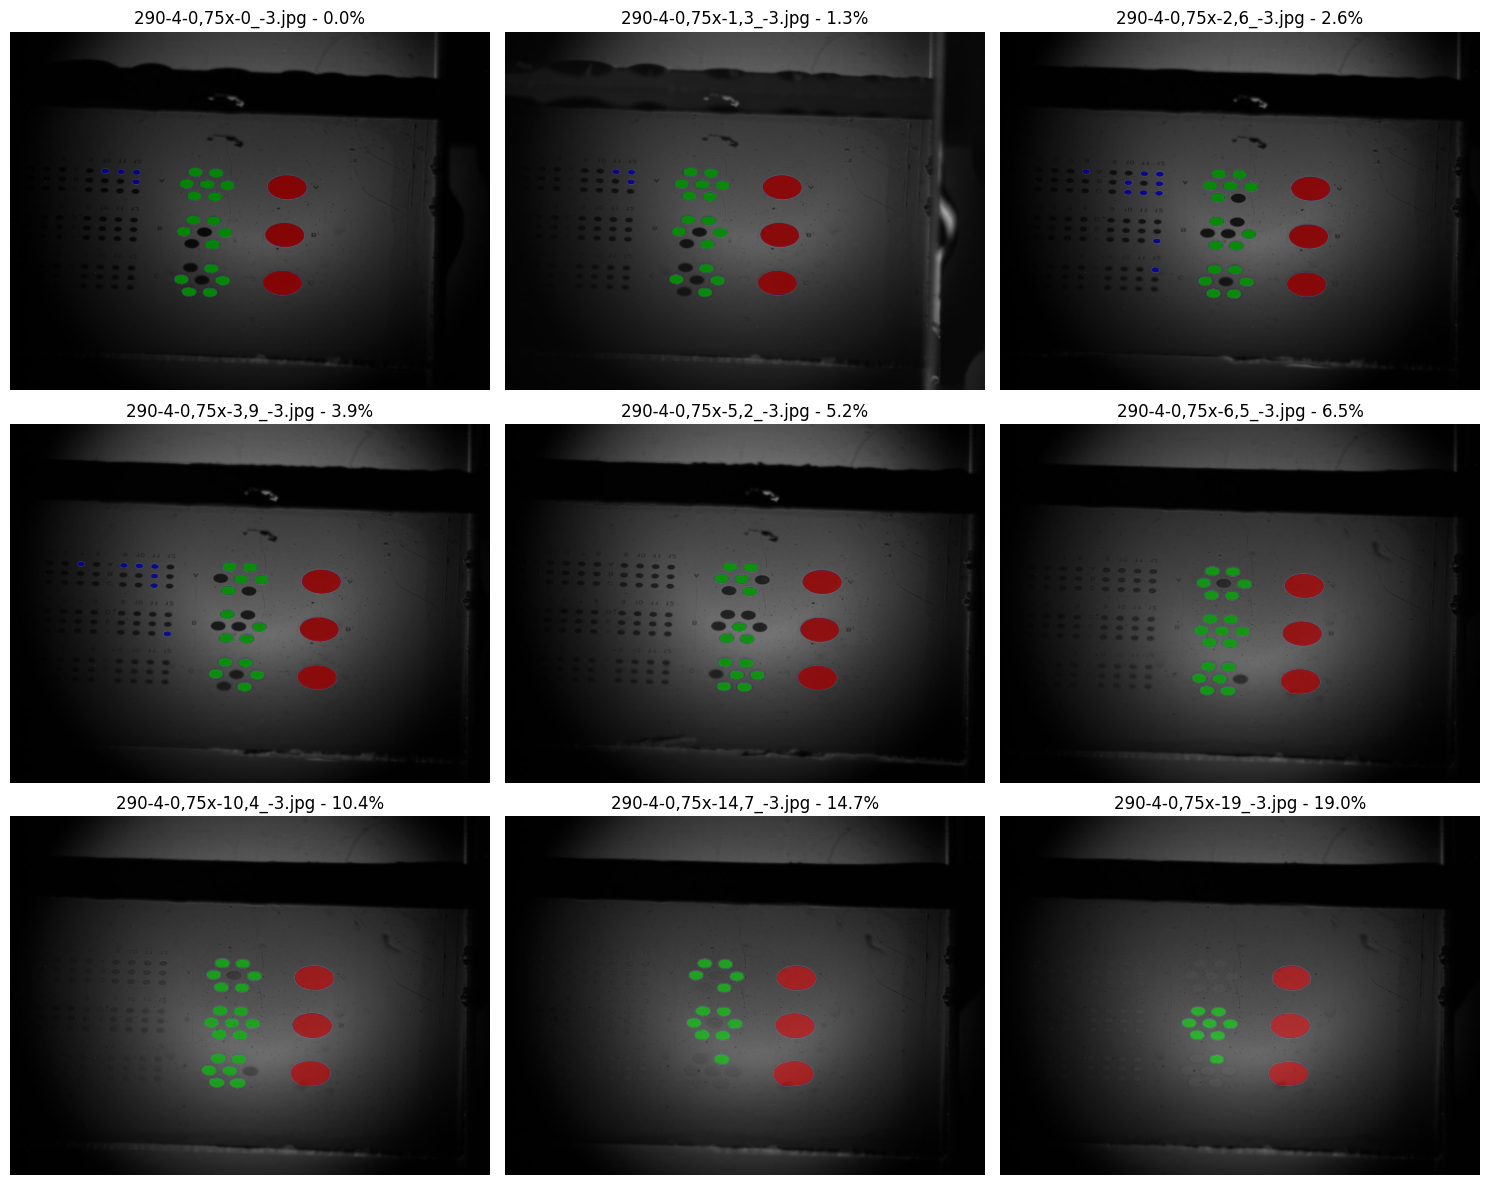

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

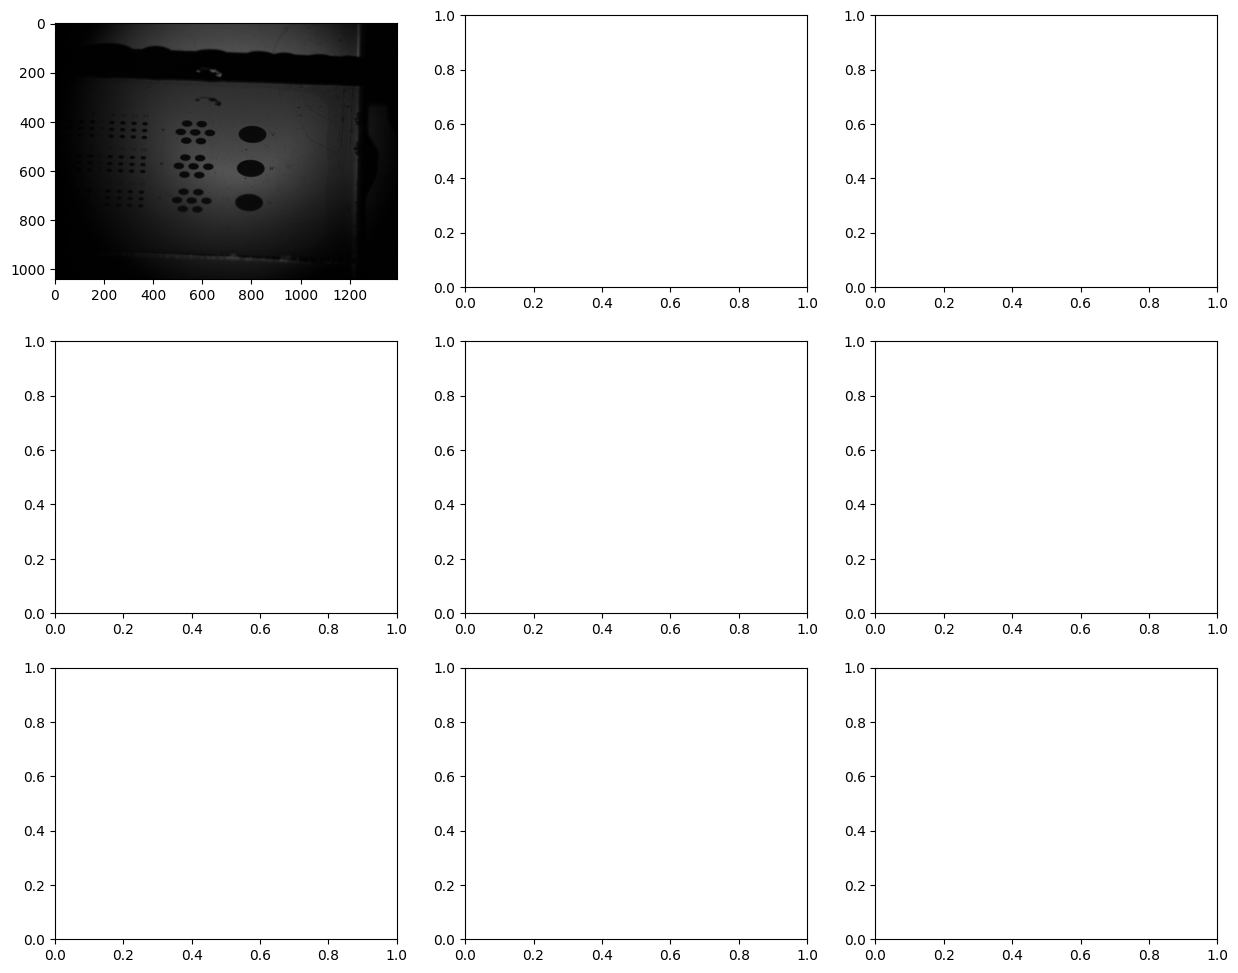

In [4]:
run_analysis(data, model)

"""    
    # Draw 3 plots visualizing the average intensity vs RI by well size
    # Plot the calibration curve - large
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].errorbar(df_calibration['RI'], df_calibration['mean_intensity_large'],
                 yerr=df_calibration['std_intensity_large'], fmt='o', capsize=5,
                 color='blue', markersize=8, label='Measured Data')

    # Perform linear regression - large
    slope, intercept, r_value, p_value, std_err = linregress(
        df_calibration['RI'], df_calibration['mean_intensity_large']
    )
    r_squared = r_value**2
    x_fit = np.linspace(df_calibration['RI'].min(), df_calibration['RI'].max(), 100)
    y_fit = slope * x_fit + intercept
    axes[0].plot(x_fit, y_fit, '--', color='red',
             label=f'Linear Fit\ny = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.4f}')

    # Annotate points with NaCl percentages - large
    for i, row in df_calibration.iterrows():
        axes[0].annotate(f"{row['NaCl_percentage']}%",
                     (row['RI'], row['mean_intensity_large']),
                     xytext=(5, 5), textcoords='offset points')

    axes[0].set_title(f'Calibration Curve - Large Wells')
    axes[0].set_xlabel('Refractive Index (RI)')
    axes[0].set_ylabel('Mean Intensity (AU/pixel)')
    axes[0].grid(False)
    axes[0].legend(loc="upper left")
    
    # Plot the calibration curve - medium
    axes[1].errorbar(df_calibration['RI'], df_calibration['mean_intensity_medium'],
                 yerr=df_calibration['std_intensity_medium'], fmt='o', capsize=5,
                 color='blue', markersize=8, label='Measured Data')

    # Perform linear regression - medium
    slope, intercept, r_value, p_value, std_err = linregress(
        df_calibration['RI'], df_calibration['mean_intensity_medium']
    )
    r_squared = r_value**2
    x_fit = np.linspace(df_calibration['RI'].min(), df_calibration['RI'].max(), 100)
    y_fit = slope * x_fit + intercept
    axes[1].plot(x_fit, y_fit, '--', color='red',
             label=f'Linear Fit\ny = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.4f}')

    # Annotate points with NaCl percentages - medium
    for i, row in df_calibration.iterrows():
        axes[1].annotate(f"{row['NaCl_percentage']}%",
                     (row['RI'], row['mean_intensity_medium']),
                     xytext=(5, 5), textcoords='offset points')

    axes[1].set_title(f'Calibration Curve - Medium Wells')
    axes[1].set_xlabel('Refractive Index (RI)')
    axes[1].set_ylabel('Mean Intensity (AU/pixel)')
    axes[1].grid(False)
    axes[1].legend(loc="upper left")
    
    # # Plot the calibration curve - small
    axes[2].errorbar(df_calibration['RI'], df_calibration['mean_intensity_small'],
                 yerr=df_calibration['std_intensity_small'], fmt='o', capsize=5,
                 color='blue', markersize=8, label='Measured Data')

    # # Perform linear regression - small
    slope, intercept, r_value, p_value, std_err = linregress(
        df_calibration['RI'], df_calibration['mean_intensity_small']
    )
    r_squared = r_value**2
    x_fit = np.linspace(df_calibration['RI'].min(), df_calibration['RI'].max(), 100)
    y_fit = slope * x_fit + intercept
    axes[2].plot(x_fit, y_fit, '--', color='red',
             label=f'Linear Fit\ny = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.4f}')

    # # Annotate points with NaCl percentages - small
    for i, row in df_calibration.iterrows():
        axes[2].annotate(f"{row['NaCl_percentage']}%",
                     (row['RI'], row['mean_intensity_small']),
                     xytext=(5, 5), textcoords='offset points')

    axes[2].set_title(f'Calibration Curve - Small Wells')
    axes[2].set_xlabel('Refractive Index (RI)')
    axes[2].set_ylabel('Mean Intensity (AU/pixel)')
    axes[2].grid(False)
    axes[2].legend()
    
    # Plot the calibration curve - all
    axes[3].errorbar(df_calibration['RI'], df_calibration['mean_intensity_all'],
                 yerr=df_calibration['std_intensity_all'], fmt='o', capsize=5,
                 color='blue', markersize=8, label='Measured Data')

    # Perform linear regression - all
    slope, intercept, r_value, p_value, std_err = linregress(
        df_calibration['RI'], df_calibration['mean_intensity_all']
    )
    r_squared = r_value**2
    x_fit = np.linspace(df_calibration['RI'].min(), df_calibration['RI'].max(), 100)
    y_fit = slope * x_fit + intercept
    axes[3].plot(x_fit, y_fit, '--', color='red',
             label=f'Linear Fit\ny = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.4f}')

    # Annotate points with NaCl percentages - all
    for i, row in df_calibration.iterrows():
        axes[3].annotate(f"{row['NaCl_percentage']}%",
                     (row['RI'], row['mean_intensity_all']),
                     xytext=(5, 5), textcoords='offset points')

    axes[3].set_title(f'Calibration Curve - All Wells')
    axes[3].set_xlabel('Refractive Index (RI)')
    axes[3].set_ylabel('Mean Intensity (AU/pixel)')
    axes[3].grid(False)
    axes[3].legend()
    fig.savefig("large_medium_wells_plot.svg", format='svg', dpi=300, bbox_inches='tight', transparent=True)
    
    plt.tight_layout()
    plt.show()
    
    # Output calibration data and regression results
    print("\n===== Calibration Data =====")
    print(df_data.to_string(index=False))
"""     
        